## Matting
Using %%timeit obtained 419 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

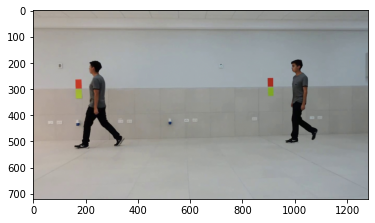

In [5]:

# Read the images
fg = cv2.imread("/home/josmar/proyectos/codes/datasets/ucb_gait_frames/images/027-002.jpg")
bg = cv2.imread("/home/josmar/proyectos/codes/datasets/ucb_gait_frames/images/027-094.jpg")
a = cv2.imread("/home/josmar/proyectos/codes/datasets/ucb_gait_frames/mattes/027-002.png")

# Convert uint8 to float
foreground = fg.astype(float)
background = bg.astype(float)

# Normalize the alpha mask to keep intensity between 0 and 1
alpha = a.astype(float)/255

# Multiply the foreground with the alpha matte
foreground = cv2.multiply(alpha, foreground)

# Multiply the background with ( 1 - alpha )
background = cv2.multiply(1.0 - alpha, background)

# Add the masked foreground and background.
outImage = cv2.add(foreground, background)

cv2.imwrite("new_new_out.jpg",outImage)
# Display image
plt.imshow((outImage/255)[:,:,::-1])


In [2]:
fg1 = cv2.imread("/home/josmar/proyectos/codes/datasets/ucb_gait_frames/images/027-002.jpg")
fg2 = cv2.imread("/home/josmar/proyectos/codes/datasets/ucb_gait_frames/images/027-008.jpg")
a1 = cv2.imread("/home/josmar/proyectos/codes/datasets/ucb_gait_frames/mattes/027-002.png")
a2 = cv2.imread("/home/josmar/proyectos/codes/datasets/ucb_gait_frames/mattes/027-008.png")
bg = cv2.imread("/media/josmar/Nuevo vol/Experiments/segmentation_codes/background.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


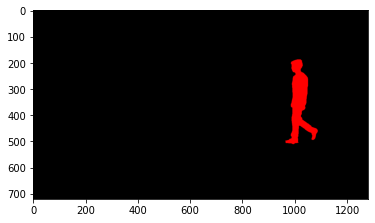

/home/josmar/proyectos/codes/datasets/ucb_gait_frames/images/027-002.jpg
/home/josmar/proyectos/codes/datasets/ucb_gait_frames/mattes/027-002.png


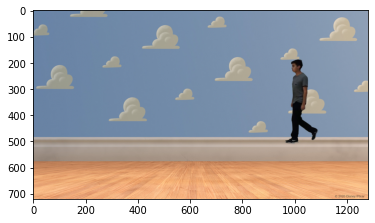

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


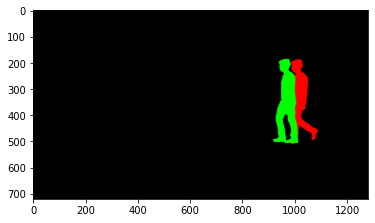

/home/josmar/proyectos/codes/datasets/ucb_gait_frames/images/027-008.jpg
/home/josmar/proyectos/codes/datasets/ucb_gait_frames/mattes/027-008.png


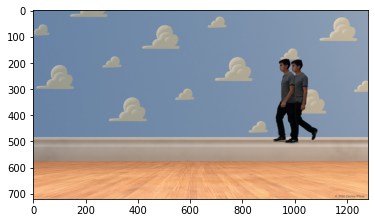

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


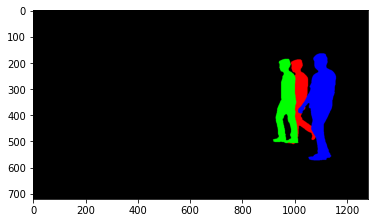

/home/josmar/proyectos/codes/datasets/ucb_gait_frames/images/002-008.jpg
/home/josmar/proyectos/codes/datasets/ucb_gait_frames/mattes/002-008.png


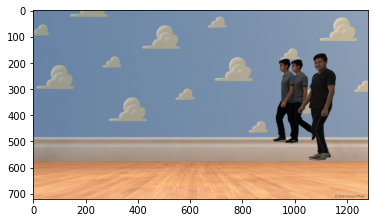

True

In [21]:

my_list = [
    {"image":"/home/josmar/proyectos/codes/datasets/ucb_gait_frames/images/027-002.jpg",
    "matte": "/home/josmar/proyectos/codes/datasets/ucb_gait_frames/mattes/027-002.png",
    "silhouette":"/home/josmar/proyectos/codes/datasets/ucb_gait_frames/silhouettes/027-002.png"},
    {"image":"/home/josmar/proyectos/codes/datasets/ucb_gait_frames/images/027-008.jpg",
    "matte": "/home/josmar/proyectos/codes/datasets/ucb_gait_frames/mattes/027-008.png",
    "silhouette":"/home/josmar/proyectos/codes/datasets/ucb_gait_frames/silhouettes/027-008.png"},
    {"image":"/home/josmar/proyectos/codes/datasets/ucb_gait_frames/images/002-008.jpg",
    "matte": "/home/josmar/proyectos/codes/datasets/ucb_gait_frames/mattes/002-008.png",
    "silhouette":"/home/josmar/proyectos/codes/datasets/ucb_gait_frames/silhouettes/002-008.png"}
]
colors = [(255,0,0),(0,255,0),(0,0,255)]
bg = cv2.imread("/media/josmar/Nuevo vol/Experiments/segmentation_codes/background.jpg")
silhouettes = np.zeros(bg.shape, np.float64) 
index = 0
for paths in my_list:
    img = cv2.imread(paths["image"]).astype(float)
    matte = cv2.imread(paths["matte"]).astype(float)/255
    sil = cv2.imread(paths["silhouette"]).astype(float)/255

    silhouettes = cv2.multiply(1.0-sil,silhouettes)
    silhouettes = cv2.add(sil*colors[index], silhouettes)
    
    plt.imshow(silhouettes)
    plt.show()

    bg = bg.astype(float)
    fg = cv2.multiply(img,matte)
    
    # Multiply the background with ( 1 - alpha )
    back = cv2.multiply(1.0 - matte, bg)

    # Add the masked foreground and background.
    bg = cv2.add(fg, back)
    print(paths["image"])
    print(paths["matte"])
    plt.imshow((bg/255)[:,:,::-1])
    plt.show()
    index+=1

cv2.imwrite("new_new_out.jpg",bg)
    


In [20]:
sub_a = silhouettes
np.unique(sub_a.reshape(-1, sub_a.shape[2]), axis=0).shape

(4, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


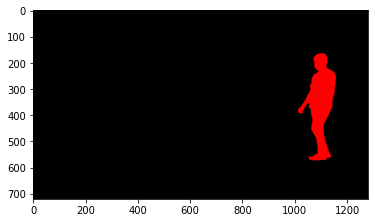

In [18]:
silhouettes.